# U.S.–Korea Interest Rate Differential and KRW/USD Exchange Rate

This project analyzes whether differences between U.S. and South Korean interest rates
are associated with movements in the KRW/USD exchange rate using time-series data.


## Data Collection and Preparation

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
start = dt.datetime(2005, 1, 1)
end = dt.datetime(2025, 1, 1)

us_rate = pdr.DataReader('FEDFUNDS', 'fred', start, end)
kr_rate = pdr.DataReader('INTDSRKRM193N', 'fred', start, end)
exchange = pdr.DataReader('DEXKOUS', 'fred', start, end)

df = pd.concat([us_rate, kr_rate, exchange], axis=1)
df.columns = ['US_rate', 'KR_rate', 'KRW_USD']
df = df.dropna()
df.head()

,US_rate,KR_rate,KRW_USD
DATE,,,
2005-02-01,2.50,2.0,1027.35
2005-03-01,2.63,2.0,1003.85
2005-04-01,2.79,2.0,1012.00
2005-06-01,3.04,2.0,1010.00
2005-07-01,3.26,2.0,1033.00


The merged dataset contains monthly observations of U.S. and South Korean policy
interest rates along with the KRW/USD exchange rate. After removing missing values,
the dataset is suitable for regression analysis.

## Interest Rate Differential

This section constructs the interest rate differential between the United States and South Korea, 
defined as the difference between the U.S. policy rate and the South Korean policy rate. 
This variable serves as the key explanatory variable in the regression analysis.

In [3]:
df['rate_diff'] = df['US_rate'] - df['KR_rate']
df.head()

,US_rate,KR_rate,KRW_USD,rate_diff
DATE,,,,
2005-02-01,2.50,2.0,1027.35,0.50
2005-03-01,2.63,2.0,1003.85,0.63
2005-04-01,2.79,2.0,1012.00,0.79
2005-06-01,3.04,2.0,1010.00,1.04
2005-07-01,3.26,2.0,1033.00,1.26


The table above shows the constructed interest rate differential alongside the exchange rate.
Positive values of the differential indicate periods when U.S. interest rates exceeded those of South Korea.

To provide a visual overview of exchange rate dynamics, the following figure plots the KRW/USD exchange rate over time.
This helps identify major trends and periods of heightened volatility.


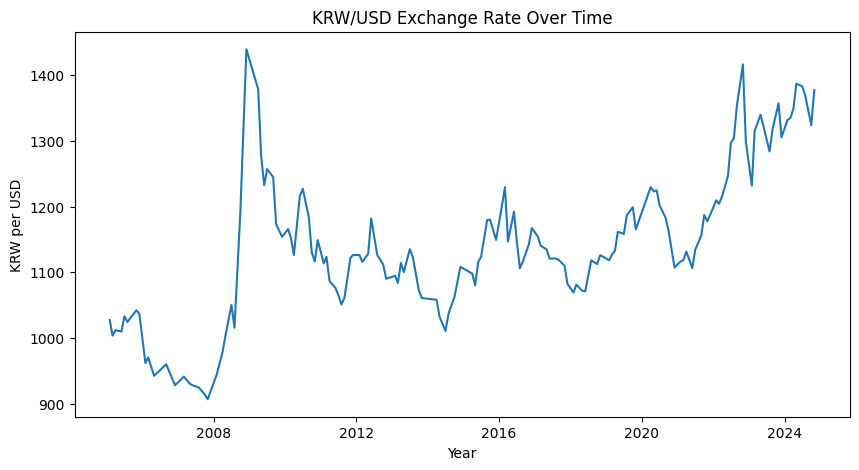

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df.index, df['KRW_USD'])
plt.title('KRW/USD Exchange Rate Over Time')
plt.xlabel('Year')
plt.ylabel('KRW per USD')
plt.show()

The exchange rate exhibits substantial volatility over the sample period, particularly during episodes of global financial stress.
These patterns suggest that exchange rate movements are influenced by broader macroeconomic and financial factors beyond interest rates alone.

To visually examine the relationship between the interest rate differential and the KRW/USD exchange rate,
the following scatter plot displays the exchange rate against the U.S.–Korea interest rate differential.
This visualization provides an initial assessment of the strength and direction of their association.

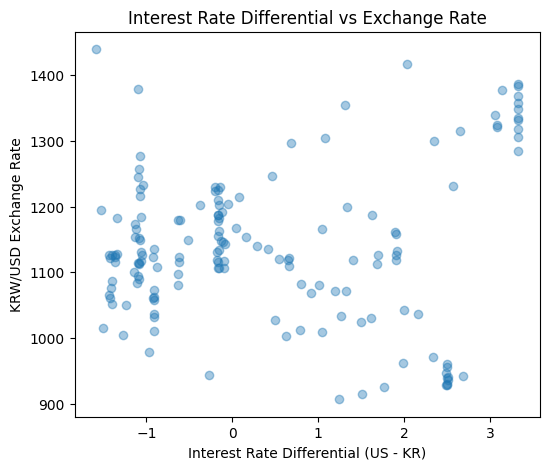

In [5]:
plt.figure(figsize=(6,5))
plt.scatter(df['rate_diff'], df['KRW_USD'], alpha=0.4)
plt.xlabel('Interest Rate Differential (US - KR)')
plt.ylabel('KRW/USD Exchange Rate')
plt.title('Interest Rate Differential vs Exchange Rate')
plt.show()

The scatter plot suggests no strong linear relationship between the interest rate differential and the exchange rate, with substantial dispersion across observations. This indicates that the association between the two variables is weak and does not provide clear evidence of a systematic relationship.

## Baseline Regression Analysis

To formally assess the relationship between the interest rate differential and the KRW/USD exchange rate,
an ordinary least squares (OLS) regression is estimated with the exchange rate as the dependent variable
and the interest rate differential as the explanatory variable.

In [6]:
import statsmodels.api as sm

X = sm.add_constant(df['rate_diff'])
y = df['KRW_USD']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                KRW_USD   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.876
Date:                Sat, 27 Dec 2025   Prob (F-statistic):             0.0919
Time:                        15:05:06   Log-Likelihood:                -967.26
No. Observations:                 157   AIC:                             1939.
Df Residuals:                     155   BIC:                             1945.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.1996      9.520    119.139      0.000    1115.394    1153.005
rate_diff     10.2767      6.059      1.696      0.092      -1.693      22.246
==============================================================================
Omnibus:                        0.034   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.016
Skew:                          -0.016   Prob(JB):                        0.992
Kurtosis:                       2.963   Cond. No.                         1.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated coefficient on the interest rate differential is positive, suggesting that a larger
U.S.–Korea interest rate gap is associated with a higher KRW/USD exchange rate.
However, the coefficient is not statistically significant at conventional levels,
and the model explains only a small fraction of the variation in the exchange rate, as indicated by the low R-squared value. The low R-squared value indicates that most of the variation in the KRW/USD exchange rate is driven by factors not captured in this simple model.

The Durbin–Watson statistic is well below 2, indicating strong positive serial correlation in the residuals. This suggests that the simple OLS specification may be insufficient for time-series data.

These results suggest that contemporaneous interest rate differentials alone do not sufficiently
explain exchange rate movements, motivating the consideration of dynamic effects and lagged
relationships in subsequent analysis.

## Lagged Interest Rate Differential

Exchange rate responses to interest rate changes may occur with a delay rather than instantaneously.
To capture potential dynamic effects, a one-period lag of the interest rate differential is constructed
and used as the explanatory variable.

In [7]:
df['rate_diff_lag1'] = df['rate_diff'].shift(1)
df_lag = df.dropna()
df_lag.head()


,US_rate,KR_rate,KRW_USD,rate_diff,rate_diff_lag1
DATE,,,,,
2005-03-01,2.63,2.0,1003.85,0.63,0.50
2005-04-01,2.79,2.0,1012.00,0.79,0.63
2005-06-01,3.04,2.0,1010.00,1.04,0.79
2005-07-01,3.26,2.0,1033.00,1.26,1.04
2005-08-01,3.50,2.0,1024.50,1.50,1.26


The table above shows the lagged interest rate differential aligned with the exchange rate,
ensuring that the explanatory variable precedes the dependent variable in time.

The coefficient on the lagged interest rate differential remains positive but is not statistically
significant, and the explanatory power of the model remains very limited.
This suggests that even when accounting for delayed effects, interest rate differentials alone
do not provide a strong explanation for KRW/USD exchange rate movements.

The low Durbin–Watson statistic again points to serial correlation in the residuals, reinforcing the limitations of a simple OLS approach for modeling exchange rate dynamics.

These findings are consistent with the view that exchange rates are driven by a broad set of factors,
including global risk sentiment, capital flows, and expectations, beyond simple interest rate differentials.

In [8]:
X_lag = sm.add_constant(df_lag['rate_diff_lag1'])
y_lag = df_lag['KRW_USD']

model_lag = sm.OLS(y_lag, X_lag).fit()
model_lag.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                KRW_USD   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.572
Date:                Sat, 27 Dec 2025   Prob (F-statistic):              0.212
Time:                        15:05:06   Log-Likelihood:                -961.78
No. Observations:                 156   AIC:                             1928.
Df Residuals:                     154   BIC:                             1934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1136.0669      9.570    118.710      0.000    1117.161    1154.973
rate_diff_lag1     7.7107      6.151      1.254      0.212      -4.440      19.861
==============================================================================
Omnibus:                        0.073   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.067
Skew:                           0.044   Prob(JB):                        0.967
Kurtosis:                       2.951   Cond. No.                         1.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation and First Differences

To address potential non-stationarity in the exchange rate series, the KRW/USD exchange rate is transformed using logarithms and first differences. The log-differenced exchange rate approximates percentage changes and helps stabilize the variance of the series, making it more suitable for time-series regression analysis.

In [9]:
import numpy as np

df['log_krw_usd'] = np.log(df['KRW_USD'])
df['d_log_krw_usd'] = df['log_krw_usd'].diff()

df_change = df.dropna()
df_change.head()

,US_rate,KR_rate,KRW_USD,rate_diff,rate_diff_lag1,log_krw_usd,d_log_krw_usd
DATE,,,,,,,
2005-03-01,2.63,2.0,1003.85,0.63,0.50,6.911598,-0.023140
2005-04-01,2.79,2.0,1012.00,0.79,0.63,6.919684,0.008086
2005-06-01,3.04,2.0,1010.00,1.04,0.79,6.917706,-0.001978
2005-07-01,3.26,2.0,1033.00,1.26,1.04,6.940222,0.022517
2005-08-01,3.50,2.0,1024.50,1.50,1.26,6.931960,-0.008263


In [10]:
X_chg = sm.add_constant(df_change['rate_diff'])
y_chg = df_change['d_log_krw_usd']

model_chg = sm.OLS(y_chg, X_chg).fit()
model_chg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          d_log_krw_usd   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5561
Date:                Sat, 27 Dec 2025   Prob (F-statistic):              0.457
Time:                        15:05:06   Log-Likelihood:                 306.14
No. Observations:                 156   AIC:                            -608.3
Df Residuals:                     154   BIC:                            -602.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.003      0.851      0.396      -0.003       0.008
rate_diff     -0.0013      0.002     -0.746      0.457      -0.005       0.002
==============================================================================
Omnibus:                       63.544   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.910
Skew:                           1.352   Prob(JB):                     6.32e-77
Kurtosis:                       9.832   Cond. No.                         1.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

Overall, the results suggest that U.S.–Korea interest rate differentials alone do not provide a strong explanation for KRW/USD exchange rate movements. The presence of serial correlation and low explanatory power highlights the importance of considering additional macroeconomic factors and more advanced time-series models in future research. Future research could extend this analysis by incorporating additional macroeconomic variables such as inflation differentials, capital flows, or global risk indicators, as well as more advanced time-series models.
